**install library python**

In [10]:
!pip install tensorflow
!pip install tensorflow-gpu==2.0.0.alpha0
!pip install tensorflow-gpu --upgrade --force-reinstall

     |████████████████████████████████| 320.4MB 52kB/s 
     |████████████████████████████████| 1.3MB 54.4MB/s 
     |████████████████████████████████| 2.9MB 51.8MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 20.1MB 1.2MB/s 
     |████████████████████████████████| 6.8MB 49.0MB/s 
     |████████████████████████████████| 26.1MB 117kB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 3.4MB 43.0MB/s 
     |████████████████████████████████| 133kB 49.6MB/s 
     |████████████████████████████████| 460kB 51.4MB/s 
     |████████████████████████████████| 808kB 44.9MB/s 
     |████████████████████████████████| 307kB 58.9MB/s 
     |████████████████████████████████| 92kB 12.9MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 92kB 12.1MB/s 
     |████████████████████████████████| 788kB 48.5MB/s 


In [1]:
import tensorflow as tf
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
tf.__version__

'2.3.0'

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O ./cats_and_dogs_filtered.zip

--2020-08-30 10:40:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M   137MB/s    in 0.5s    

2020-08-30 10:40:06 (137 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!ls ./

cats_and_dogs_filtered.zip  sample_data


In [4]:
# Unzip cats_and_dogs
dataset_path = "./cats_and_dogs_filtered.zip"

In [5]:
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")

In [6]:
zip_object.extractall("./")

In [7]:
zip_object.close()

In [8]:
#Path Dataset
dataset_path_new = "./cats_and_dogs_filtered/"

In [9]:
train_dir = os.path.join(dataset_path_new,"train")
validation_dir = os.path.join(dataset_path_new,"validation")

In [10]:
#Model
# SHAPE 
IMG_SHAPE = (128,128,3)

In [11]:
import pandas as pd

# load dogs
dg = os.path.join(train_dir,"dogs")
filenames = os.listdir(dg)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df_dogs = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [12]:
df_dogs.head()

,filename,category
0,dog.477.jpg,1
1,dog.968.jpg,1
2,dog.286.jpg,1
3,dog.672.jpg,1
4,dog.598.jpg,1


In [13]:
# load dogs
dg = os.path.join(train_dir,"cats")
filenames = os.listdir(dg)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df_cats = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [14]:
df_cats.head()

,filename,category
0,cat.341.jpg,0
1,cat.583.jpg,0
2,cat.791.jpg,0
3,cat.657.jpg,0
4,cat.698.jpg,0


In [15]:
frames = [df_cats,df_dogs]
df = pd.concat(frames)

In [16]:
df.tail()

,filename,category
995,dog.842.jpg,1
996,dog.891.jpg,1
997,dog.747.jpg,1
998,dog.521.jpg,1
999,dog.432.jpg,1


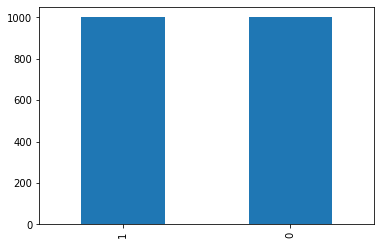

In [17]:
df['category'].value_counts().plot.bar()

In [18]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

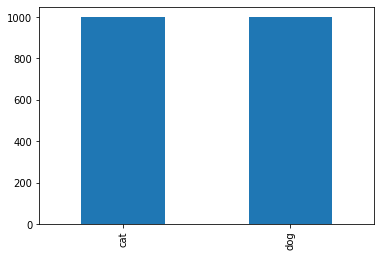

In [19]:
df['category'].value_counts().plot.bar()

In [20]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

9412608/9406464 [==============================] - 1s 0us/step


In [21]:
#Summary
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [22]:
#freeze model
base_model.trainable = False

In [23]:
# define the custom header for our neural network
base_model.output

<tf.Tensor 'out_relu/Relu6:0' shape=(None, 4, 4, 1280) dtype=float32>

In [24]:
# Global average pooling operation for spatial data
# To generate predictions from the tf.keras.layers.GlobalAveragePooling2D block to 1280
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [25]:
global_average_layer

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [26]:
# Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image. You don't need a trigger function here because 
# this prediction will be treated as a logit or a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.
prediction_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")(global_average_layer)

In [27]:
# Define model
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [28]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________________

In [29]:
# Compile Model
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [30]:
# Data Generator
# MobileNet supports (96,96),(128,128),(160,160),(224,224)

from keras.preprocessing.image import ImageDataGenerator  

data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [31]:
train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(128,128), class_mode="binary")

Found 2000 images belonging to 2 classes.


In [32]:
valid_generator = data_gen_valid.flow_from_directory(validation_dir, target_size=(128,128), batch_size=128, class_mode="binary")

Found 1000 images belonging to 2 classes.


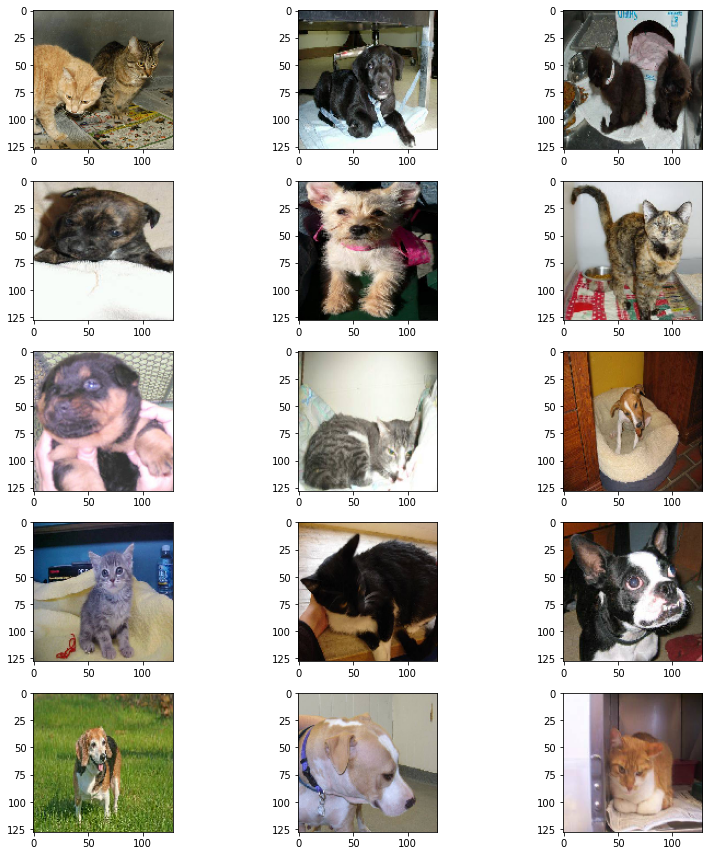

In [33]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [72]:
# Train Model
history = model.fit(train_generator, epochs=9, validation_data=valid_generator, verbose=1)
#model.fit_generator

Epoch 1/9
63/63 [==============================] - 10s 161ms/step - loss: 0.0864 - accuracy: 0.9660 - val_loss: 0.0862 - val_accuracy: 0.9720
Epoch 2/9
63/63 [==============================] - 10s 155ms/step - loss: 0.0847 - accuracy: 0.9645 - val_loss: 0.0853 - val_accuracy: 0.9710
Epoch 3/9
63/63 [==============================] - 10s 153ms/step - loss: 0.0831 - accuracy: 0.9655 - val_loss: 0.0845 - val_accuracy: 0.9740
Epoch 4/9
63/63 [==============================] - 10s 151ms/step - loss: 0.0818 - accuracy: 0.9675 - val_loss: 0.0840 - val_accuracy: 0.9710
Epoch 5/9
63/63 [==============================] - 10s 151ms/step - loss: 0.0803 - accuracy: 0.9680 - val_loss: 0.0833 - val_accuracy: 0.9730
Epoch 6/9
63/63 [==============================] - 9s 151ms/step - loss: 0.0788 - accuracy: 0.9700 - val_loss: 0.0827 - val_accuracy: 0.9720
Epoch 7/9
63/63 [==============================] - 10s 152ms/step - loss: 0.0775 - accuracy: 0.9695 - val_loss: 0.0822 - val_accuracy: 0.9730
Epoch 8

In [60]:
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])


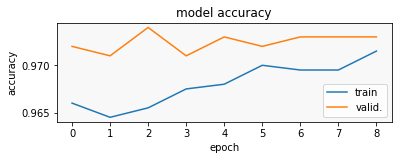

In [73]:
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)

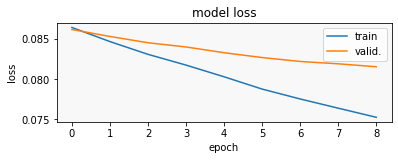

In [74]:
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [53]:
# Save Model
model.save('./dogcat_model_bak.h5')

In [54]:
# Evaluate Model
#valid_loss, valid_accuracy = model.evaluate_generator(valid_generator)
valid_loss, valid_accuracy = model.evaluate(valid_generator)

print("Accuracy after transfer learning: {}".format(valid_accuracy))

8/8 [==============================] - 3s 341ms/step - loss: 0.0871 - accuracy: 0.9710
Accuracy after transfer learning: 0.9710000157356262


In [55]:
pred = model.predict_generator(valid_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  

predicted = np.argmax(pred, axis=1)  

Instructions for updating:
Please use Model.predict, which supports generators.
8/8 [==============================] - 3s 359ms/step


In [56]:
# Load Model
from tensorflow.keras.models import load_model
classifier = load_model('./dogcat_model_bak.h5')

In [57]:
!ls -lath ./cats_and_dogs_filtered/validation/cats/cat.2000.jpg

-rw-r--r-- 1 root root 22K Aug 30 10:40 ./cats_and_dogs_filtered/validation/cats/cat.2000.jpg


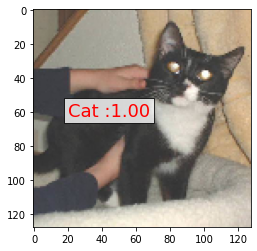

In [58]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('./cats_and_dogs_filtered/validation/cats/cat.2000.jpg', target_size=(128, 128))
#img1 = image.load_img('./cats_and_dogs_filtered/validation/dogs/dog.2000.jpg', target_size=(128, 128))
img = image.img_to_array(img1)
img = img/255

# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.

if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [71]:
from keras.preprocessing import image

img1 = image.load_img('./cats_and_dogs_filtered/validation/dogs/dog.2000.jpg', target_size=(128, 128))
img = image.img_to_array(img1)
img = img/255

# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.

#training_set.class_indices
if(prediction[:,:]>0.5):
  print('Dog')
else:
  print("cat")

Dog
